In [1]:
from graph_utils import *

In [2]:
# Loading the graphs
path = "data/6_gg_ru.npy" # Path to a file with 
corp = (np.load(path, allow_pickle=True)).tolist()
graph_embed = Graph(vertices=corp) #Graph with embeddings of words (basically, the only use is to extract SVD embeddings)
graph = convert_graph_to_networkx(corp)

100%|██████████| 1867261/1867261 [00:10<00:00, 185241.70it/s]


In [3]:
def euclid_distance(graph: Graph, first_word: str, second_word: str) -> np.float64:
    """
    Calculate Euclid distance from first_word to second_word

    Parameters
    ----------
    first_word: str,
    second_word: str

    Returns
    -------
    euclid_distance : np.float64
    """
    
    first_vertex = graph.vertices[first_word].vector
    second_vertex = graph.vertices[second_word].vector
    return np.linalg.norm(first_vertex - second_vertex)

In [34]:
def get_shortest_path_length(graph: nx.classes.graph.Graph, graph_embed: Graph, text: str) -> np.float64:
    # TODO: make it more optimized. Right now it's quite computationally heavy.
    """ 
    A function that calculates the lengths of the shortest path of an anecdote in a graph
    """
    graph_path = go_through_text("тесть поэтому называть тестем тестировать предыдущий версия жена", graph=graph)
    sp_list = convert_text_shortest_paths_to_text_words_path(graph_path)
    path_num = 0
    for i in range(1, len(sp_list)):
        path_num += euclid_distance(graph_embed, sp_list[i], sp_list[i-1])
    return path_num

In [26]:
graph_path = go_through_text("тесть поэтому называть тестем тестировать предыдущий версия жена", graph=graph)

In [27]:
sp_list = convert_text_shortest_paths_to_text_words_path(graph_path)

In [35]:
joke = "косметика одинаково полезный особенно вредный здоровье помада рубашка"
get_shortest_path_length(graph, graph_embed, joke)

6.561736121454756

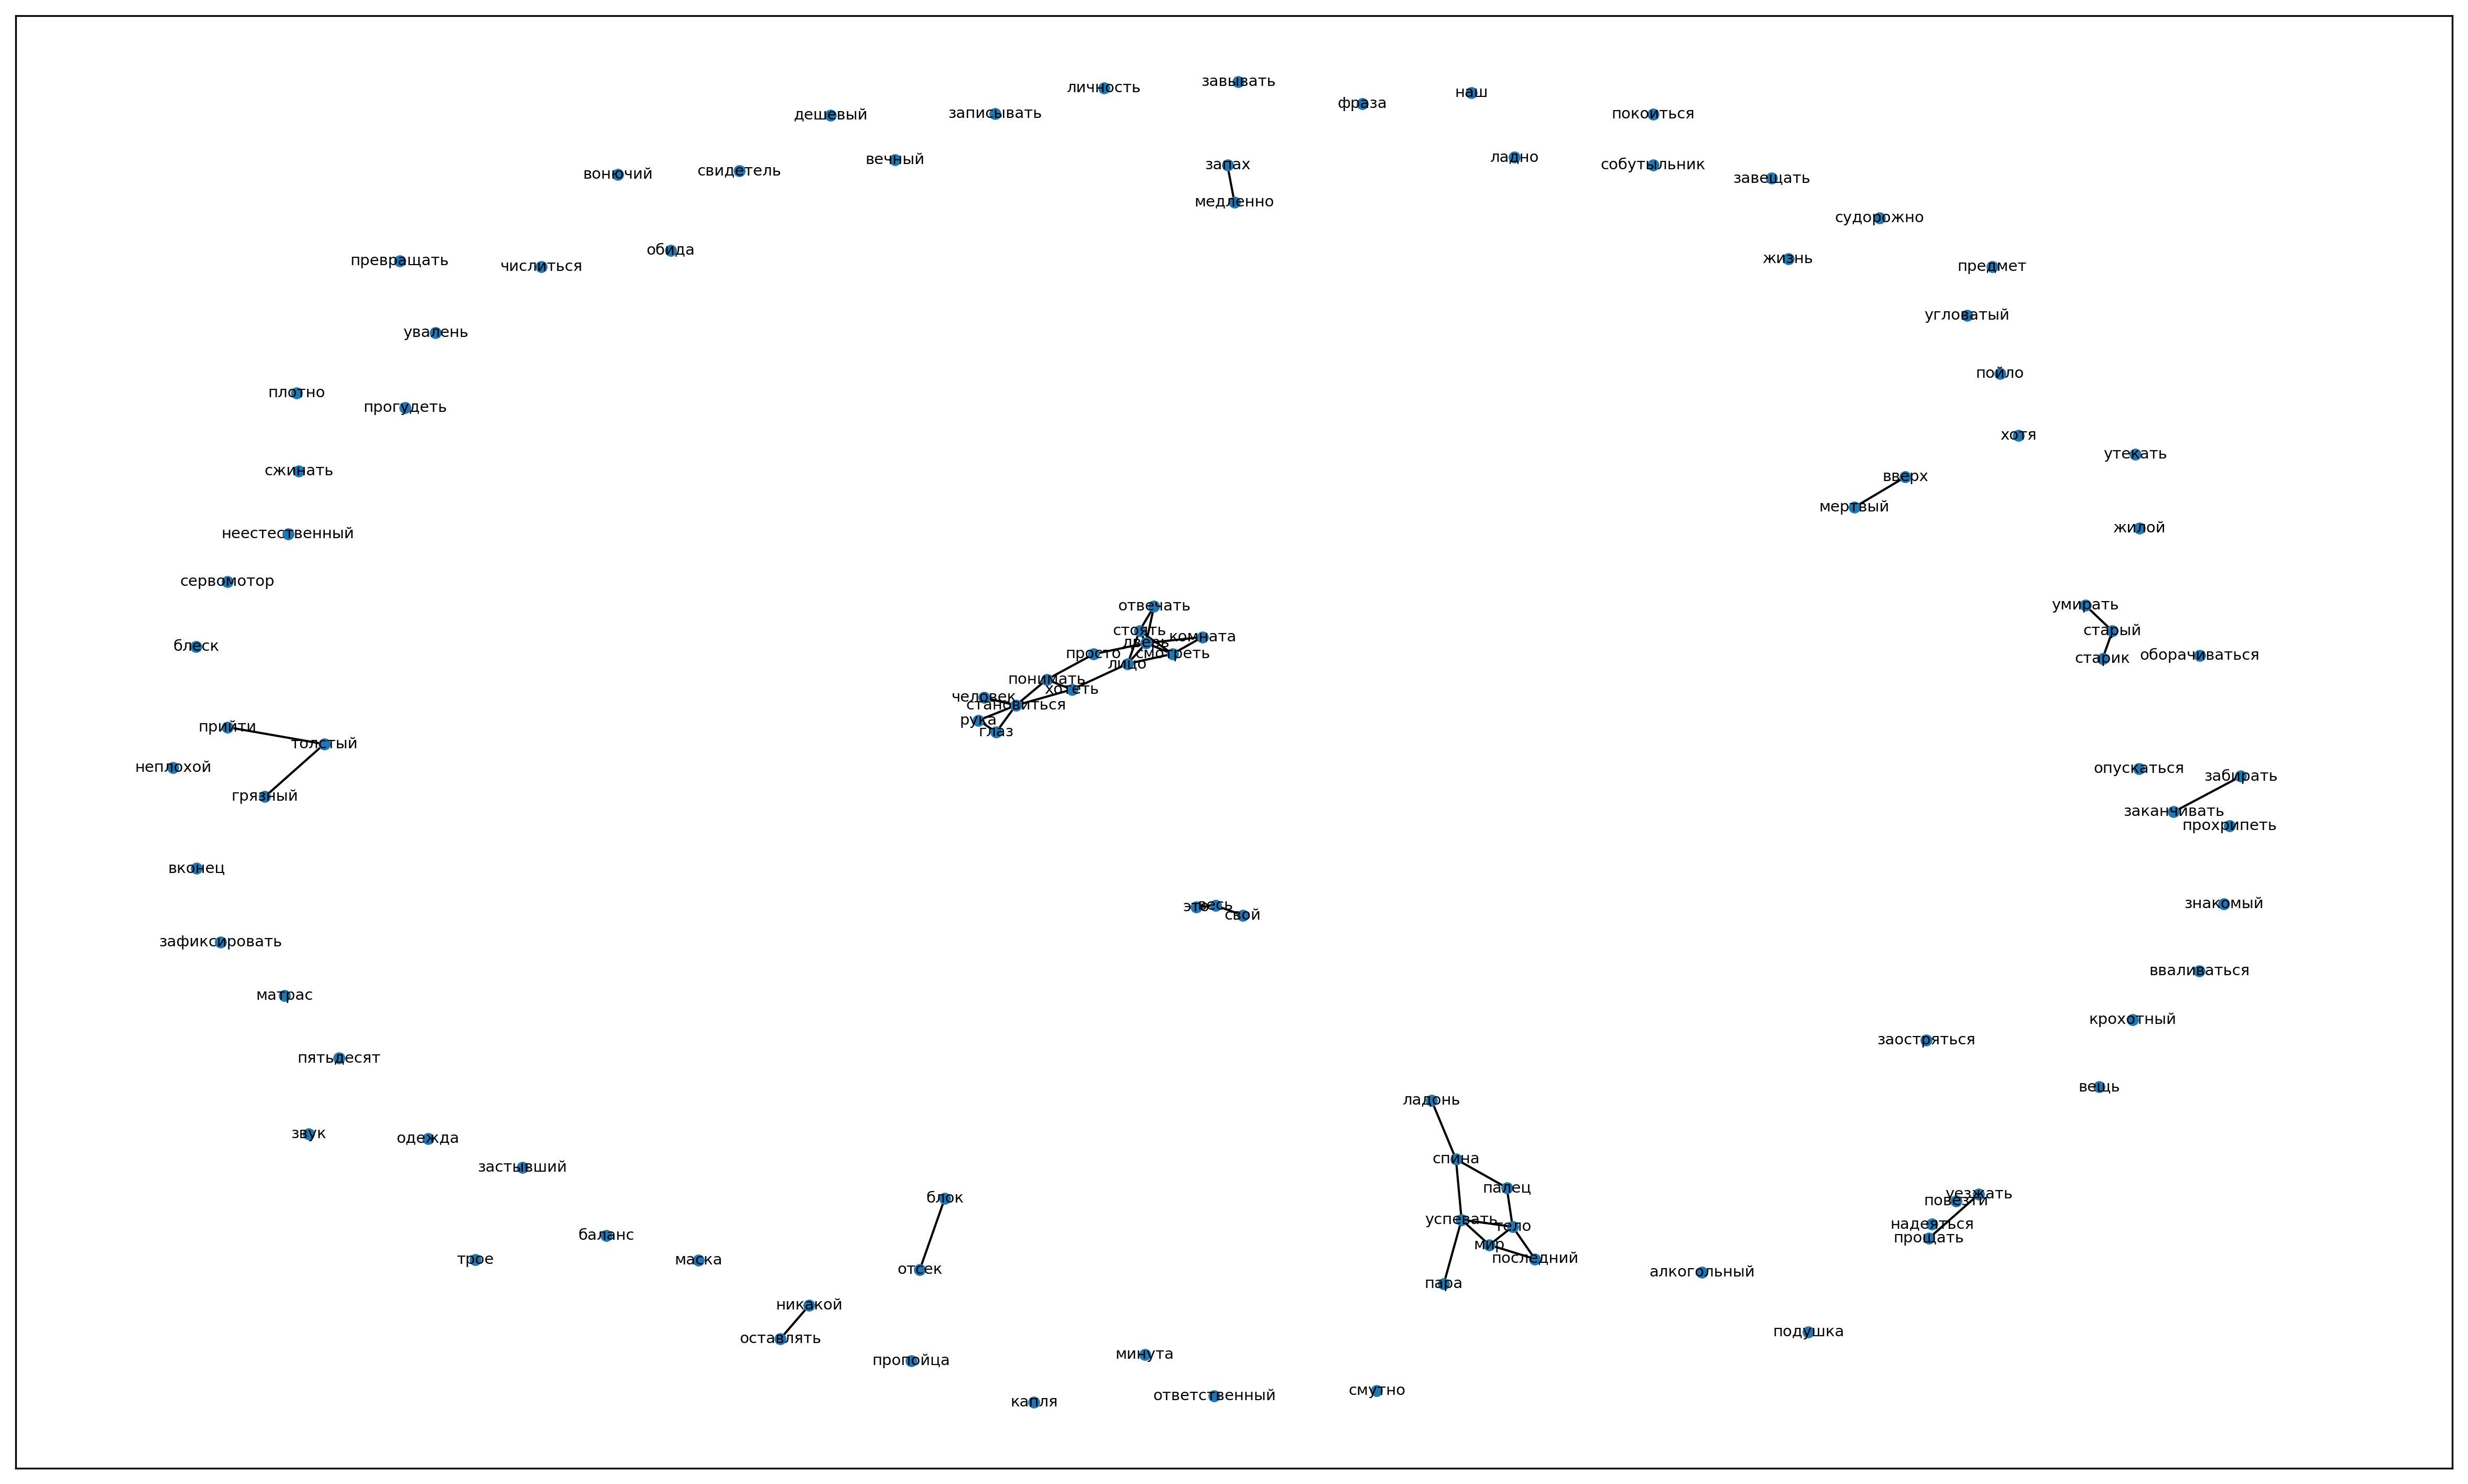

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 12), dpi=300)
nx.draw_networkx(graph_sub, node_size=20, font_size=7)

In [28]:
degrees = temp.degree()

<AxesSubplot:ylabel='Count'>

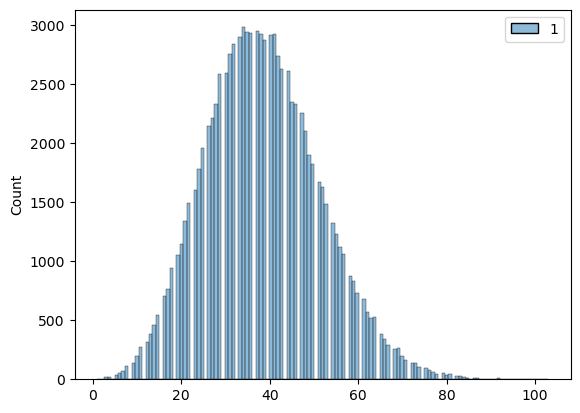

In [29]:
import seaborn as sns

sns.histplot(data=degrees)

In [30]:
len(degrees)

97031

In [31]:
temp_arr = list(degrees)
degrees_arr = []
for x in temp_arr:
    degrees_arr.append(x[1])

In [33]:
from scipy import stats
k2, p = stats.normaltest(degrees_arr)

In [35]:
print(p)

0.0
